# 2015/09/19 pyData.Okinawa meetup005  復習ミニハッカソン

## お題

Abalone Data Set @UCI

アワビの年齢を推定する

https://archive.ics.uci.edu/ml/datasets/Abalone

Rings 値を当てる

## ルール

- 2時間 チームでコーディング

- データを可視化する

- 機械学習する

- パラメータチューニングする

In [1]:
%matplotlib inline
#jupyter上での描画
import pandas as pd                 #データ分析ライブラリ 
import matplotlib.pyplot as plt     #プロット用
import numpy as np                  #多次元Array
import sklearn                      #scikit-learn

In [2]:
## UCI EDU よりデータ取得

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None,
                 names=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]) 

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [107]:
# とりあえず、Sexは数値データじゃないので真っ先に諦めた。

In [6]:
## まずseabornで可視化

In [7]:
import seaborn as sns               #visualizer

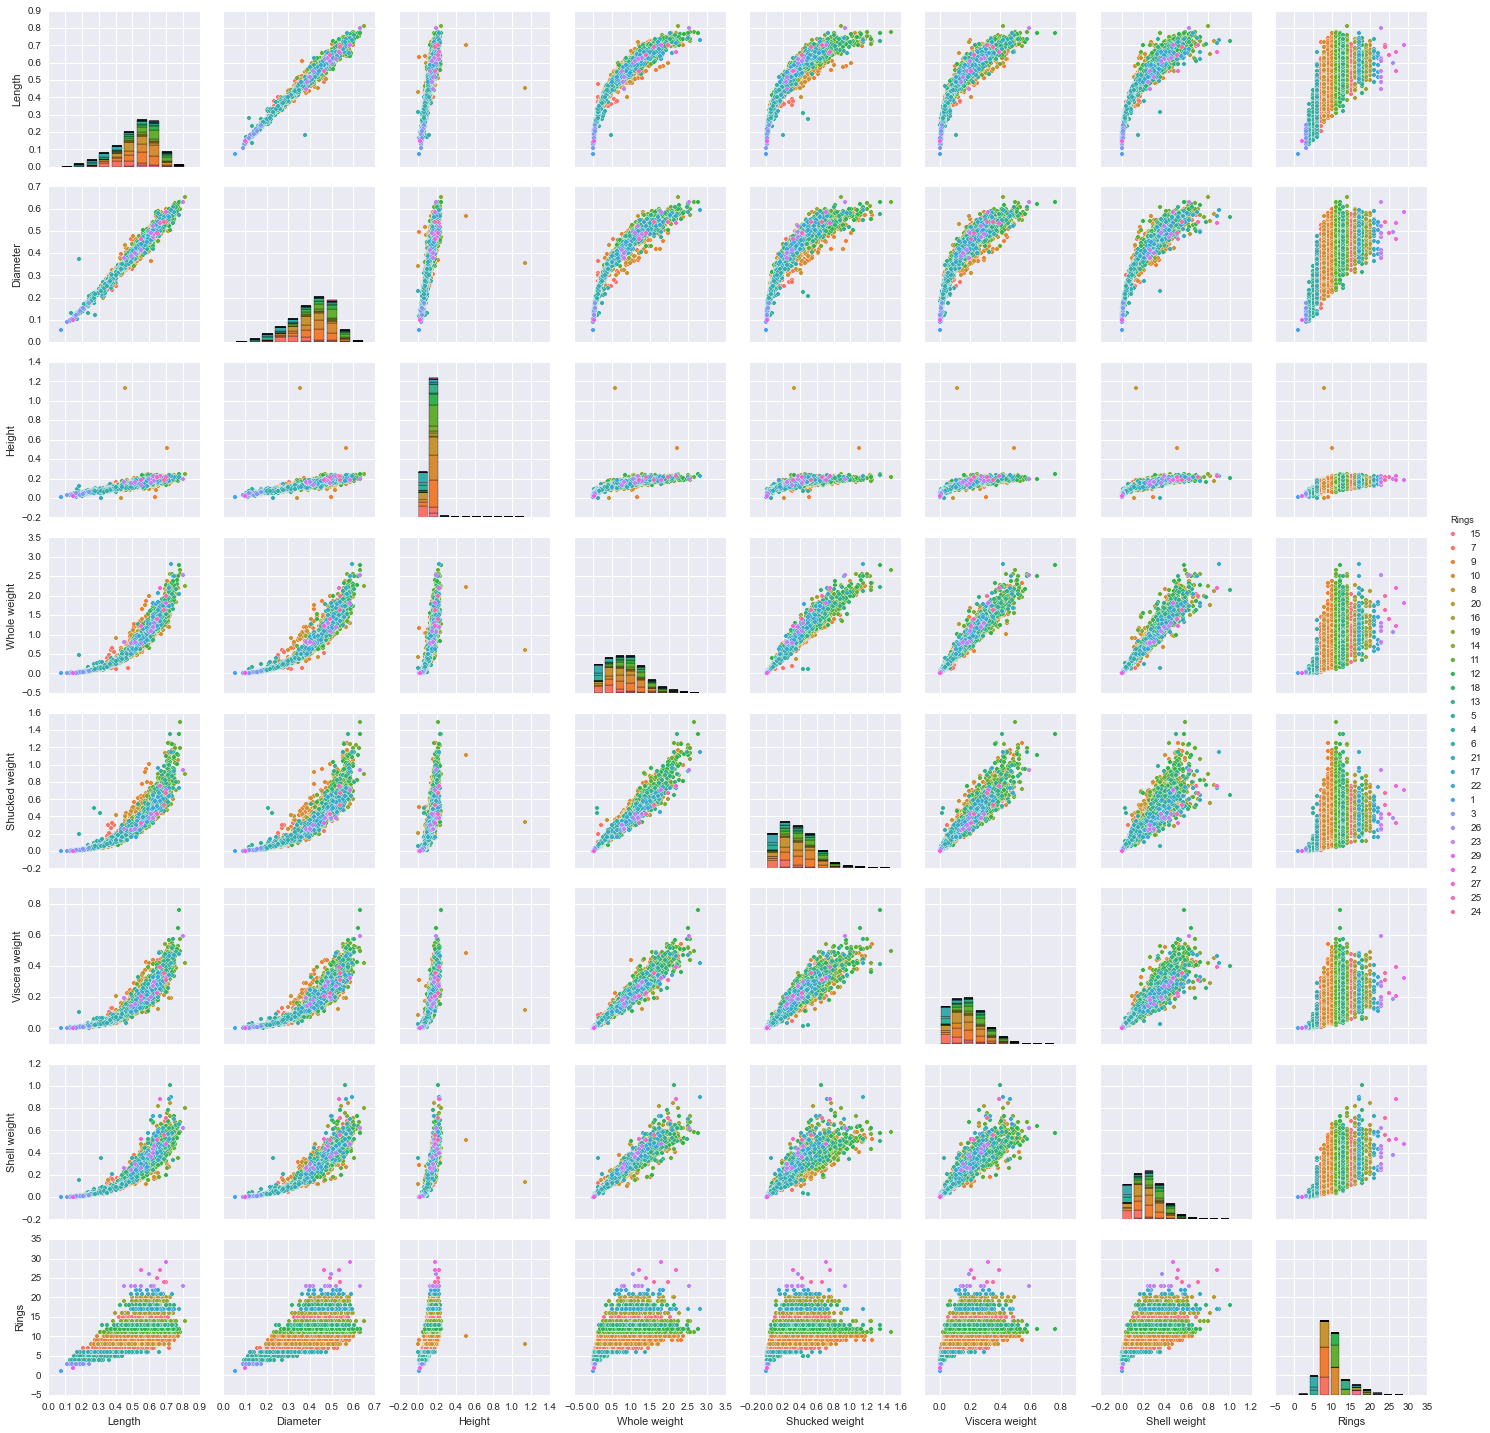

In [8]:
with sns.axes_style("darkgrid"):
    sns.pairplot(df, hue="Rings")

In [9]:
# Rings と他の値での関連性があまり見出せなかった

In [10]:
# 学習用データ作成

In [11]:
tra     = df.ix[:df.shape[0]*0.9,:] #90%をトレーニングデータ
test    = df.ix[df.shape[0]*0.9:,:] #10%をテストデータ
#シャッフルしたかったけど省略

In [13]:
tra.shape , test.shape 
#それぞれのデータ数

((3760, 9), (417, 9))

In [14]:
## Lassoで学習

In [15]:
from sklearn import linear_model
model = linear_model.Lasso  # lasso

In [52]:
model = linear_model.Lasso(alpha=0.5) # lasso 初期化 alpha は適当

In [53]:
# トレーニングデータ
tra.data = tra.ix[:,1:7] #説明変数 "Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"
tra.target = tra.ix[:,8] #被説明変数 "Rings"

# テストデータ
test.data = test.ix[:,1:7] #説明変数 "Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"
test.target = test.ix[:,8] #被説明変数 "Rings"

In [54]:
model.fit(tra.data,tra.target)    # 学習

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
p_lasso  = model.predict(test.data)    # 予測

In [56]:
model.score(test.data,test.target)     # スコア

0.19164231153069733

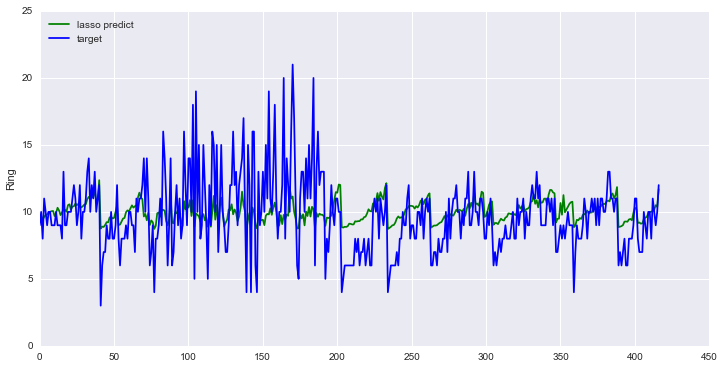

In [57]:
# グラフ描画
Plot = plt.figure(figsize=(12,6),dpi=50)
myPlot = Plot.gca()
myPlot.set_ylabel("Ring")
myPlot.plot(p_lasso,label = 'lasso predict',color='green')
myPlot.plot(test.target,label = 'target',color='blue')
myPlot.legend(loc='upper left')

In [24]:
# GridSearchCV と lassoCV の用意

In [25]:
model.get_params()  #現状のパラメータ

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [26]:
# GridSearch 候補
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
             'normalize': [True, False]}

In [31]:
from sklearn.grid_search import GridSearchCV  #GridSearch
from sklearn.linear_model import LassoCV      #lassoCV

In [32]:
grid_search = GridSearchCV(linear_model.Lasso(), param_grid=param_grid, cv=100)

In [36]:
lassoCV = LassoCV(eps=0.001, 
                       n_alphas=100, 
                       alphas=None, 
                       fit_intercept=True, 
                       normalize=False, 
                       precompute='auto', max_iter=1000, 
                       tol=0.0001, copy_X=True, cv=None, 
                       verbose=False, n_jobs=1, positive=False, 
                       random_state=None, selection='cyclic')

In [34]:
grid_search.fit(tra.data,tra.target)

GridSearchCV(cv=100, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [37]:
lassoCV.fit(tra.data,tra.target)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [38]:
grid_search.best_score_

-0.46079237463154443

In [39]:
grid_search.best_params_

{'alpha': 0.1, 'normalize': False}

In [40]:
lassoCV.score(test.data, test.target)

0.42115308146322616

In [41]:
lassoCV.get_params

<bound method LassoCV.get_params of LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)>

In [42]:
p_grid = grid_search.predict(test.data)

In [43]:
p_lassoCV = lassoCV.predict(test.data)

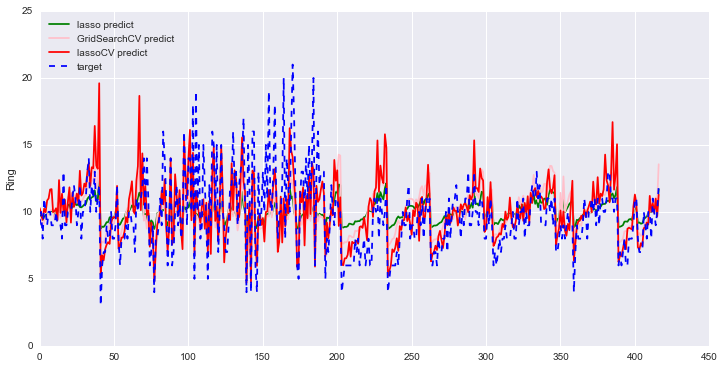

In [59]:
# グラフ描画
Plot = plt.figure(figsize=(12,6),dpi=50)
myPlot = Plot.gca()
myPlot.set_ylabel("Ring")
myPlot.plot(p_lasso,label = 'lasso predict',color='green')
myPlot.plot(p_grid,label = 'GridSearchCV predict',color='pink')
myPlot.plot(p_lassoCV,label = 'lassoCV predict',color='red')
myPlot.plot(test.target,label = 'target',color='blue', linestyle='dashed')
myPlot.legend(loc='upper left')

In [60]:
## データの分け方で train_test_split を使って見る

In [61]:
from sklearn.cross_validation import train_test_split
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    df.ix[:,1:7], df.ix[:,8], test_size=0.5, random_state=1)

In [62]:
grid_search.fit(X_train,y_train)
lassoCV.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [63]:
grid_search.score(X_test,y_test)

0.28404640426151206

In [64]:
lassoCV.score(X_test,y_test)

0.51047725233213015

In [65]:
p_grid2    = grid_search.predict(X_test)
p_lassoCV2 = lassoCV.predict(X_test)

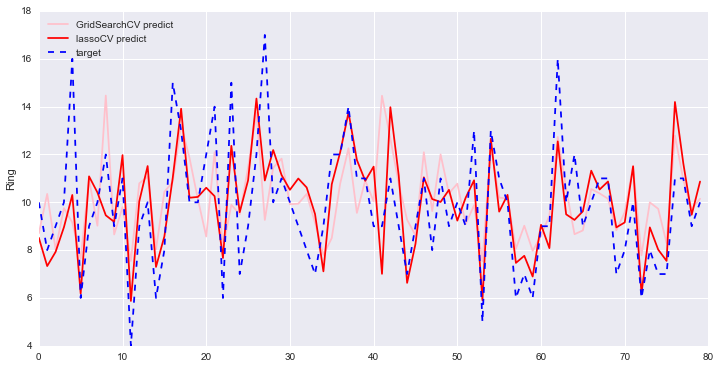

In [67]:
# グラフ描画
Plot = plt.figure(figsize=(12,6),dpi=50)
myPlot = Plot.gca()
myPlot.set_ylabel("Ring")
myPlot.plot(p_grid2[:80],label = 'GridSearchCV predict',color='pink')
myPlot.plot(p_lassoCV2[:80],label = 'lassoCV predict',color='red')
myPlot.plot(y_test[:80],label = 'target',color='blue', linestyle='dashed')
myPlot.legend(loc='upper left')

In [72]:
p_grid2.shape, p_lassoCV2.shape , y_test.shape

((2089,), (2089,), (2089,))

In [ ]:
# 結果を図式化

In [103]:
gridDf = pd.DataFrame(p_grid2,columns=['gridsearch'])
lassoDf = pd.DataFrame(p_lassoCV2,columns=['lassoCV'])
targetDf= pd.DataFrame(y_test).reset_index(drop=True)
pDf = pd.concat([gridDf,lassoDf,targetDf],axis=1)

In [104]:
pDf.head()

,gridsearch,lassoCV,Rings
0,8.700124,8.516969,10
1,10.351056,7.334029,8
2,8.035464,7.925086,9
3,9.755311,8.959210,10
4,9.158036,10.307345,16


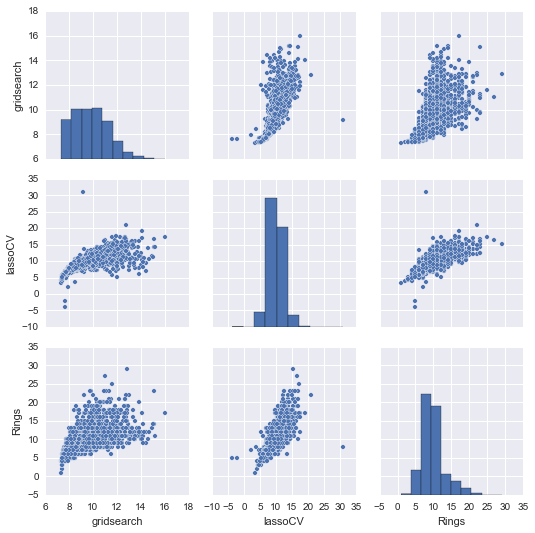

In [105]:
with sns.axes_style("darkgrid"):
    sns.pairplot(pDf)

In [106]:
# ２行目の一番右のグラフを見るとなんとなく、lassoCVの方がRings(答え)と近い感じがする